# Make pvalue dotplot with Matplotlib

In [1]:
import cnvutils
import cptac
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
params = cnvutils.load_params(os.path.join("..", "data", "params.json"))
CHROMOSOME = params["CHROMOSOME"]
ARM = params["ARM"]
CIS_OR_TRANS = "cis"

## Prepare the dataframe

In [3]:
ttest_results = pd.\
read_csv(f"{CHROMOSOME}{ARM}_ttest_{CIS_OR_TRANS}_effects.tsv", sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")

ttest_results = ttest_results[["cancer_type", "adj_p"]]

ttest_results_long = ttest_results.\
reset_index().\
melt(id_vars=["protein", "cancer_type"]).\
sort_values('protein')

## Append location data

In [4]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

In [5]:
results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

In [6]:
results = results.sort_values(['start_bp', 'cancer_type'])

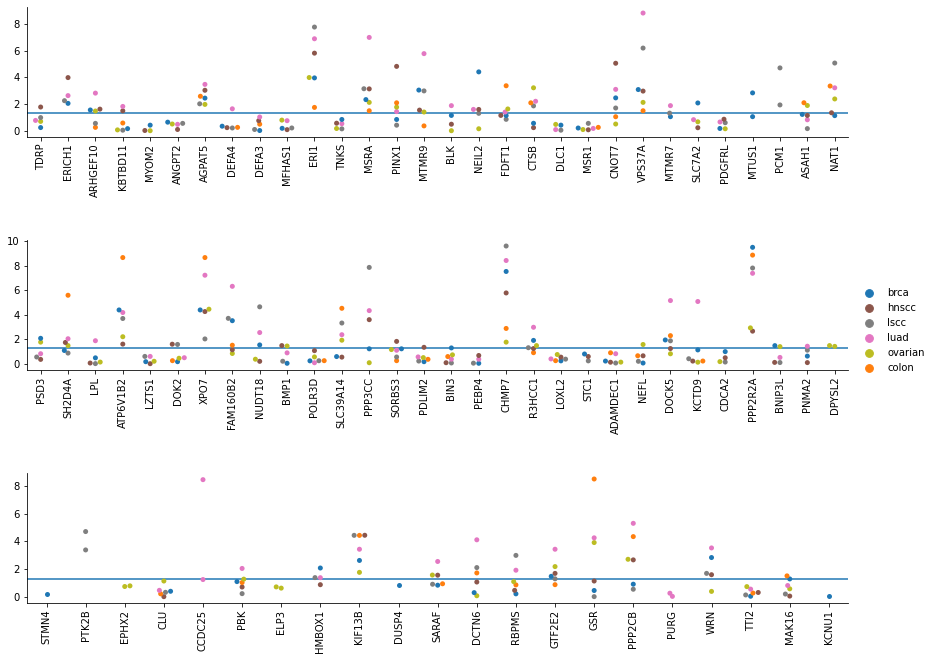

In [7]:
cnvutils.make_pvalue_plot(
    results,
    label_column='index', 
    value_column='value', 
    group_column='cancer_type')